In [24]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate Longitude values around the median 85.80015
longitude_median = 85.80015
longitude_std = 1.0
longitude = np.random.normal(loc=longitude_median, scale=longitude_std, size=1000)

# Generate Latitude values around the median 20.30363
latitude_median = 20.30363
latitude_std = 0.5
latitude = np.random.normal(loc=latitude_median, scale=latitude_std, size=1000)

# Generate random time values (hours, minutes, seconds)
hours = np.random.randint(0, 24, size=1000)
minutes = np.random.randint(0, 60, size=1000)
seconds = np.random.randint(0, 60, size=1000)

# Create a DataFrame
data = {
    'Longitude': longitude,
    'Latitude': latitude,
    'Time': [f'{h:02d}:{m:02d}:{s:02d}' for h, m, s in zip(hours, minutes, seconds)],
}

df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
df.head()

# Save the DataFrame to a CSV file if needed
# df.to_csv('artificial_dataset.csv', index=False)


,Longitude,Latitude,Time
0,86.296864,21.003308,05:22:47
1,85.661886,20.765947,10:12:00
2,86.447839,20.333445,02:31:53
3,87.323180,19.980162,07:45:24
4,85.565997,20.652742,02:51:01


In [25]:
import pandas as pd
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[20.30363, 85.80015])

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Time: {row['Time']}",
        icon=folium.Icon(color='red')
    ).add_to(m)
    
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

m.save('crime_density_map.html')
m


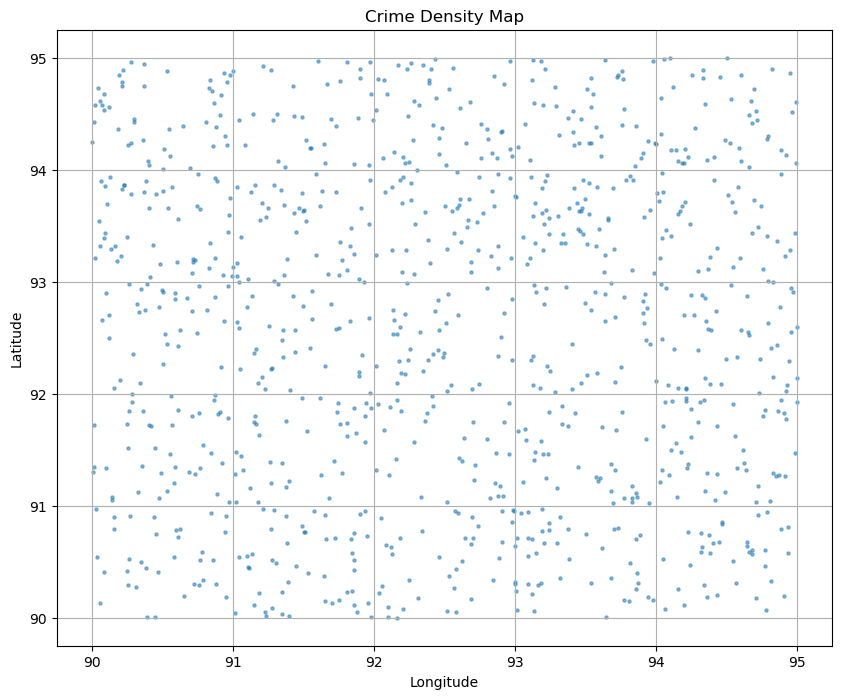

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract latitude and longitude columns from your dataset
latitudes = df['Latitude']
longitudes = df['Longitude']

# Create a scatter plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.scatter(longitudes, latitudes, alpha=0.5, s=5)  # Adjust alpha and s for transparency and point size

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Density Map')

# Show the plot
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import numpy as np
import folium
from sklearn.neighbors import KernelDensity

# Extract latitude, longitude, and timestamp columns
locations = df[['Latitude', 'Longitude']]
timestamps = df['Time']

# Create a map centered around your city
crime_map = folium.Map(location=[92.50219208546733, 92.49908925500077], zoom_start=12)

# User interface for selecting a specific time
selected_time = '2023-01-01 12:00:00'  # Replace with user-selected time

# Filter data based on the selected time
filtered_locations = locations[timestamps <= selected_time]

# Perform Kernel Density Estimation (KDE) on filtered data
kde = KernelDensity(bandwidth=0.01, metric='haversine', kernel='gaussian')
kde.fit(np.radians(filtered_locations))

# Generate grid points for density estimation
grid_points = np.linspace(filtered_locations.min(), filtered_locations.max(), 100)

# Calculate density values at grid points
log_densities = kde.score_samples(np.radians(grid_points))

# Normalize density values between 0 and 1
min_density = min(log_densities)
max_density = max(log_densities)
normalized_densities = (log_densities - min_density) / (max_density - min_density)

# Create a Folium map with color-coded markers based on crime density
for loc, density in zip(grid_points, normalized_densities):
    folium.CircleMarker(
        location=[loc[0], loc[1]],
        radius=5,
        color='#FF5733',  # Adjust color based on density
        fill=True,
        fill_color='#FF5733',
        fill_opacity=density,
    ).add_to(crime_map)

# Display the map
crime_map.save('crime_density_map.html')


C:\Users\ashut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
